# The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).# 

In [6]:
import pandas as pd
dataset  = pd.read_csv("train.csv")

In [101]:
dataset.shape

(891, 12)

In [7]:
dataset['Sex'] = dataset["Sex"].map({'male' :0 , 'female' : 1})



In [8]:
dataset['Embarked'] = dataset["Embarked"].map({'C' :1 , 'S' : 2 , "Q":3})

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [55]:
dataset.shape

(891, 8)

In [77]:
from matplotlib import pyplot as plt

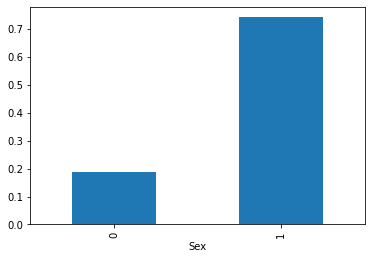

In [65]:
dataset.groupby("Sex").agg("mean")["Survived"].plot(kind="bar")

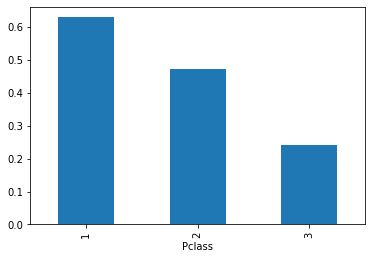

In [68]:
dataset.groupby("Pclass").agg("mean")["Survived"].plot(kind="bar")

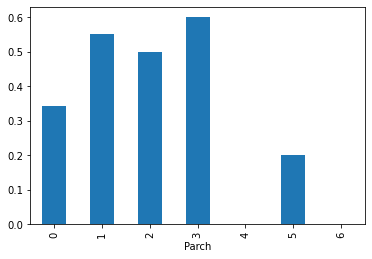

In [70]:
dataset.groupby("Parch").agg("mean")["Survived"].plot(kind="bar")

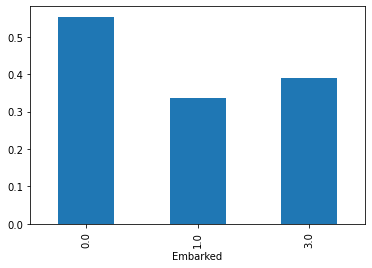

In [73]:
dataset.groupby("Embarked").agg("mean")["Survived"].plot(kind="bar")

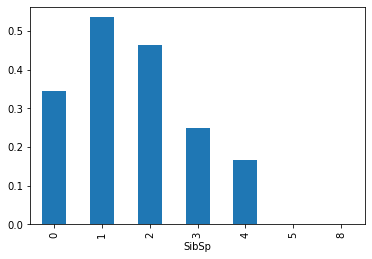

In [74]:
dataset.groupby("SibSp").agg("mean")["Survived"].plot(kind="bar")

In [104]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [10]:
features = [ "Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [11]:
label = ["Survived"]

In [12]:
import numpy as np

In [13]:
dataset[features].dropna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,2.0
3,1,1,35.0,1,0,53.1000,2.0
4,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,3.0
886,2,0,27.0,0,0,13.0000,2.0
887,1,1,19.0,0,0,30.0000,2.0
889,1,0,26.0,0,0,30.0000,1.0


In [14]:
X= np.array(dataset[features])
Y = np.array(dataset[label])

In [15]:
col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])

In [73]:
dataset[features].dropna().shape

(712, 7)

In [74]:
train_X = X[0:550]
test_X = X[550:]
train_Y = Y[0:550]
test_Y = Y[550:]

In [75]:
print(train_X.shape)
print(test_X.shape)

(550, 7)
(341, 7)


In [18]:
def sigmoid(Z):
    s = 1 /(1 + np.exp(-Z))
    return s


In [19]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    np.random.seed(2)
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.random.randn(dim,1)
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [20]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)

    A = sigmoid(np.dot( X , w) + b)  

    # compute activation
    cost = -(1/m)* np.sum( Y * np.log(A) + (1-Y) * np.log((1-A)) )      # compute cost

    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m) * ( np.dot( X.T , (A-Y)))
    db = (1/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [21]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w =  w - learning_rate * ( dw)
        b =  b - learning_rate * ( db)
        
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [103]:
# GRADED FUNCTION: predict

def predict(w, b, X ):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(  X,w) + b) 

    ### END CODE HERE ###
    
    for i in range(A.shape[0]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if(A[i,0]>=0.5):
            Y_prediction[i,0]=1
        else:
            Y_prediction[i,0]=0
        ### END CODE HERE ###
#     print(Y_prediction.T)
    assert(Y_prediction.shape == (m,1))
    
    return Y_prediction

In [109]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    m = X_train.shape[1]
    # initialize parameters with zeros (≈ 1 line of code)
    w, b =initialize_with_zeros(m)

    # Gradient descent (≈ 1 line of code)
    m = X_train.shape[0]
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test =  predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [179]:
d = model(train_X ,train_Y, test_X, test_Y, num_iterations = 2000, learning_rate = 0.004, print_cost = True)

Cost after iteration 0: 37.674780
Cost after iteration 100: 0.984917
Cost after iteration 200: 0.944712
Cost after iteration 300: 0.909327
Cost after iteration 400: 0.877982


c:\users\lenevo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
c:\users\lenevo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 500: 0.850030
Cost after iteration 600: 0.824934
Cost after iteration 700: 0.802245
Cost after iteration 800: 0.781593
Cost after iteration 900: 0.762671
Cost after iteration 1000: 0.745235
Cost after iteration 1100: 0.737376
Cost after iteration 1200: 0.738085
Cost after iteration 1300: 0.726160
Cost after iteration 1400: 0.714912
Cost after iteration 1500: 0.704268
Cost after iteration 1600: 0.694161
Cost after iteration 1700: 0.684531
Cost after iteration 1800: 0.675334
Cost after iteration 1900: 0.666538
train accuracy: 68.72727272727272 %
test accuracy: 75.95307917888563 %


In [168]:
w=d['w'] 
b=d['b']

In [155]:
 w ,b

(array([[-0.52019074],
        [ 1.02104087],
        [-0.04906404],
        [ 0.25590776],
        [-1.21903367],
        [ 0.00401514],
        [ 0.50092429]]),
 0.10529664292727872)

Now our model is ready.
Now we have to submit a output file on kaggle plateform for this problem.

In [26]:
tests = pd.read_csv("test.csv")

In [40]:
tests['Sex'] = tests["Sex"].map({'male' :0 , 'female' : 1})

In [41]:
tests['Embarked'] = tests["Embarked"].map({'C' :1 , 'S' : 2 , "Q":3})

In [42]:
tests


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,2


In [43]:
X1= np.array(tests[features])

In [49]:
col_mean = np.nanmean(X1, axis=0)
inds = np.where(np.isnan(X1))
X1[inds] = np.take(col_mean, inds[1])

In [50]:
X1

array([[ 3.        ,  0.        , 34.5       , ...,  0.        ,
         7.8292    ,  3.        ],
       [ 3.        ,  1.        , 47.        , ...,  0.        ,
         7.        ,  2.        ],
       [ 2.        ,  0.        , 62.        , ...,  0.        ,
         9.6875    ,  3.        ],
       ...,
       [ 3.        ,  0.        , 38.5       , ...,  0.        ,
         7.25      ,  2.        ],
       [ 3.        ,  0.        , 30.27259036, ...,  0.        ,
         8.05      ,  2.        ],
       [ 3.        ,  0.        , 30.27259036, ...,  1.        ,
        22.3583    ,  1.        ]])

In [175]:
Ypred = predict(w, b, X1)

In [180]:
Ypred.shape

(418, 1)

In [123]:
Output =np.zeros((Ypred.shape[0] , 2))
Output.shape

(418, 2)

In [124]:
Pid = tests["PassengerId"]

In [137]:
id = np.array(Pid)
len(id)

418

In [176]:
dic_list = []
for i in range(len(id)):
    di = dict()
    di[ "PassengerId"] =int(id[i])
    di[ "Survived"] =int(Ypred[i,0])
    dic_list.append(di)
print(dic_list)

[{'PassengerId': 892, 'Survived': 0}, {'PassengerId': 893, 'Survived': 0}, {'PassengerId': 894, 'Survived': 0}, {'PassengerId': 895, 'Survived': 0}, {'PassengerId': 896, 'Survived': 1}, {'PassengerId': 897, 'Survived': 0}, {'PassengerId': 898, 'Survived': 1}, {'PassengerId': 899, 'Survived': 0}, {'PassengerId': 900, 'Survived': 1}, {'PassengerId': 901, 'Survived': 0}, {'PassengerId': 902, 'Survived': 0}, {'PassengerId': 903, 'Survived': 0}, {'PassengerId': 904, 'Survived': 1}, {'PassengerId': 905, 'Survived': 0}, {'PassengerId': 906, 'Survived': 1}, {'PassengerId': 907, 'Survived': 1}, {'PassengerId': 908, 'Survived': 0}, {'PassengerId': 909, 'Survived': 0}, {'PassengerId': 910, 'Survived': 1}, {'PassengerId': 911, 'Survived': 0}, {'PassengerId': 912, 'Survived': 0}, {'PassengerId': 913, 'Survived': 0}, {'PassengerId': 914, 'Survived': 1}, {'PassengerId': 915, 'Survived': 0}, {'PassengerId': 916, 'Survived': 1}, {'PassengerId': 917, 'Survived': 0}, {'PassengerId': 918, 'Survived': 1}, 

In [177]:
import csv
csvfile=open('Output2.csv','w', newline='')
fields=list(dic_list[0].keys())
obj=csv.DictWriter(csvfile, fieldnames=fields)
obj.writeheader()
obj.writerows(dic_list)
csvfile.close()